In [92]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv("train_data.csv")
df.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [93]:
df.drop(columns = ['ID','HealthServiceArea'],inplace=True,axis=1)
df.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


Drop the columns ID and HeatlServiceArea

#EDA and Statistics

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

The data has  categorical columns :
<br> 1.Gender
<br> 2.Race
<br> 3.PaymentTypology
<br> 4.Emergency Depearment Indicator 
<br> <b> Even though the columns CCSProcedureCode and APRSeverityofIllnessCode are numeric, they seem to be categorical in nature which must be verified 

In [94]:
df.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


Few observations from the description statistics:
    <br>1. The average LengthOfStay(LOS) is 2.53 and the min=1 and max=10
    <br>2. The average AverageCostInCounty is 2372 and AvergaeChargesInCounty is 7979 . whats the correlatio between these two ?
    <br><b> It would be intersting toobserve the correlation between these and the LengthOfStay(LOS)

In [95]:
col_values = df['LengthOfStay'].values
df.groupby(['LengthOfStay']).count()
#unique_val = pd.unique(col_values)
#print(sorted(unique_val))

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
LengthOfStay,,,,,,,,,,,,,
1,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895
2,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
3,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000
4,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504
5,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342
6,557,557,557,557,557,557,557,557,557,557,557,557,557
7,346,346,346,346,346,346,346,346,346,346,346,346,346
8,145,145,145,145,145,145,145,145,145,145,145,145,145
9,97,97,97,97,97,97,97,97,97,97,97,97,97


The examples with < 4 days is 49895 and 10,071 >=4 days .
<br> 1. (<  4 days) => 83.36 %
<br> 2. (>=4 days) => 16.64 %



In [96]:
#So lets change the LengthOfStay 
def change_los(x):
    if x < 4:
        return 0
    return 1
df['LengthOfStay'] = df['LengthOfStay'].apply(change_los)

In [97]:
df.head(3)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,0
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,0
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,0


In [98]:
col_values = df['LengthOfStay'].values
df.groupby(['LengthOfStay']).count()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
LengthOfStay,,,,,,,,,,,,,
0,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895
1,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071


<b> So the above change was successful and this confirms our previous undesrtanding that the dat contains samples LOS < 4 

Lets now look at if there any NULL values 

In [99]:
df.isnull().any()

Gender                          False
Race                            False
TypeOfAdmission                 False
CCSProcedureCode                False
APRSeverityOfIllnessCode        False
PaymentTypology                 False
BirthWeight                     False
EmergencyDepartmentIndicator    False
AverageCostInCounty             False
AverageChargesInCounty          False
AverageCostInFacility           False
AverageChargesInFacility        False
AverageIncomeInZipCode          False
LengthOfStay                    False
dtype: bool

<b> So the dataset doesnot contain any NULL values 

#<b> Now lets do some data visualzation and find the distribution of the atributes and their correlation

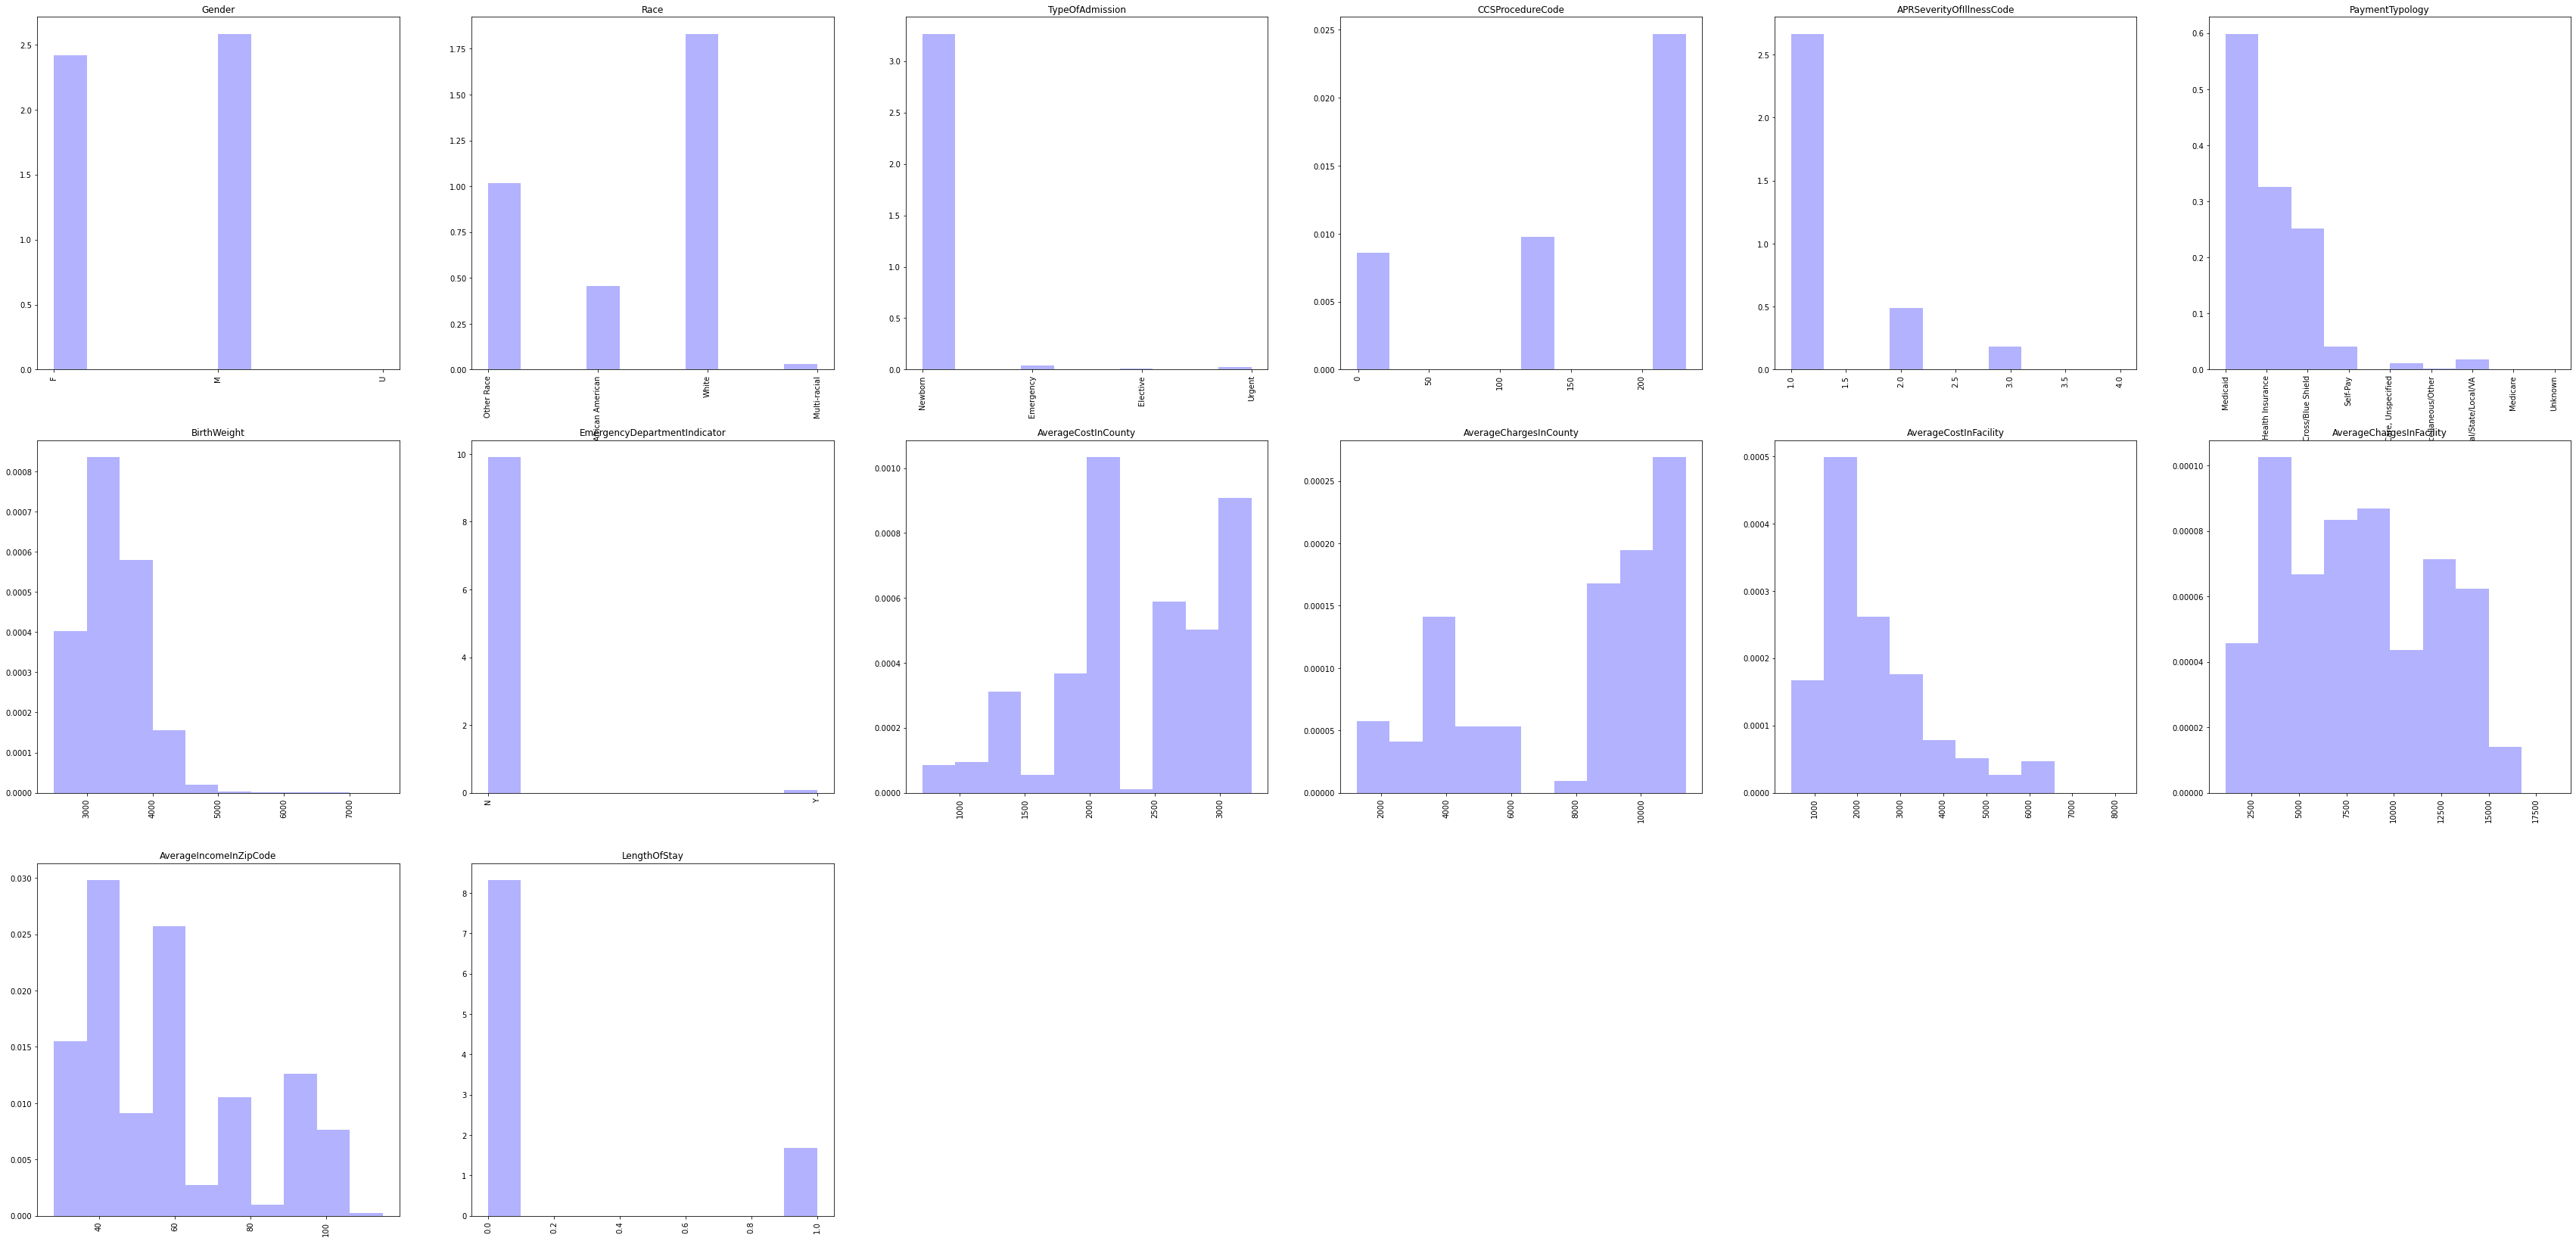

In [100]:
plt.figure(figsize=(60,60))
#plt.figure(figsize=(6,6))
for i,col in enumerate(df.columns):
    plt.subplot(6,6,i+1)
    plt.hist(df[col],alpha=0.3, color= 'b',density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

In [63]:

df[['Race','Gender']].groupby(['Race']).count()


,Gender
Race,
Black/African American,8183
Multi-racial,526
Other Race,18314
White,32943


In [101]:
df[['Race','Gender']].groupby(['Gender']).count()

,Race
Gender,
F,28987
M,30978
U,1


Key takeaways from the sample given:
    <br>Definitely the classes are imbalanced with respect to LengthofStay as the measure 
    <br> Females are 48.34 % and males form 51.66 % of the samples 
    <br> Whites are 54.94% ,30.54% other race and 13.65% Black/African American and remaining Multi racial 
   

In [64]:
df[['Race','TypeOfAdmission']].groupby(['TypeOfAdmission']).count()

,Race
TypeOfAdmission,
Elective,154
Emergency,659
Newborn,58741
Urgent,412


The large number of observations are related to Newborn (97.96%) with next highest being Emrgencies followed by Urgent and the lective samples are very eless

<b>So the next line of thoughts are to handle the Categorical variables and look at the distribution of the  attributes 

(array([4.03628723e-04, 8.36907581e-04, 5.80362205e-04, 1.55488110e-04,
        2.07450889e-05, 2.10119067e-06, 3.33522329e-07, 3.00170096e-07,
        1.00056699e-07, 3.33522329e-08]),
 array([2500., 3000., 3500., 4000., 4500., 5000., 5500., 6000., 6500.,
        7000., 7500.]),
 <BarContainer object of 10 artists>)

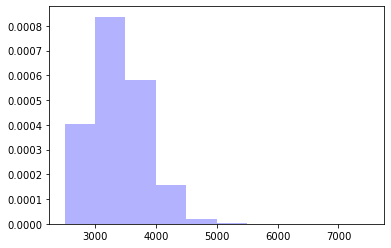

In [103]:
  plt.hist(df['BirthWeight'],alpha=0.3, color= 'b',density=True)

In [104]:
df['BirthWeight'].max()

7500

In [105]:
df['BirthWeight'].min()

2500

So the birth wight of 7500 looks like an outlier and we cannot assume the distribution is skewed rather anything above 5000 must be assumned to be an outlier condition

(array([0.00859539, 0.        , 0.        , 0.        , 0.        ,
        0.00979578, 0.        , 0.        , 0.        , 0.02471228]),
 array([ -1. ,  22.2,  45.4,  68.6,  91.8, 115. , 138.2, 161.4, 184.6,
        207.8, 231. ]),
 <BarContainer object of 10 artists>)

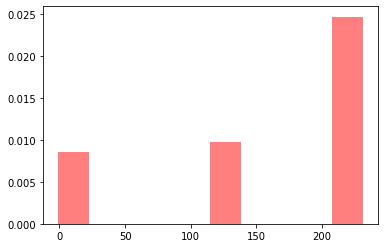

In [115]:
plt.hist(df['CCSProcedureCode'],alpha=0.5,color='r',density='True')

In [111]:
df[['CCSProcedureCode','LengthOfStay']].groupby(['CCSProcedureCode']).count()

,LengthOfStay
CCSProcedureCode,
-1,769
0,11189
115,13628
216,740
220,10773
228,19886
231,2981


<b>So the CCS procedure code is kind of fixed and we can assume that only specific codes . We can assume its ordinal in nature

(array([2.66556604e+00, 0.00000000e+00, 0.00000000e+00, 4.86942601e-01,
        0.00000000e+00, 0.00000000e+00, 1.80769102e-01, 0.00000000e+00,
        0.00000000e+00, 5.55870549e-05]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

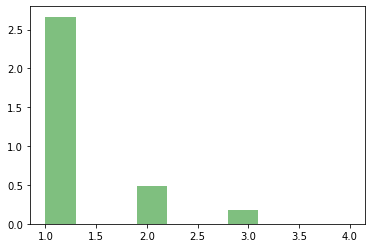

In [113]:
plt.hist(df['APRSeverityOfIllnessCode'],alpha=0.5,color='g',density='True')

In [114]:
string='APRSeverityOfIllnessCode'
df[['CCSProcedureCode',string]].groupby([string]).count()

,CCSProcedureCode
APRSeverityOfIllnessCode,
1,47953
2,8760
3,3252
4,1


(array([5.98735117e-01, 3.25351032e-01, 2.51663443e-01, 4.13567688e-02,
        0.00000000e+00, 1.13606043e-02, 2.45972718e-03, 1.76975286e-02,
        9.17186406e-04, 4.58593203e-04]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

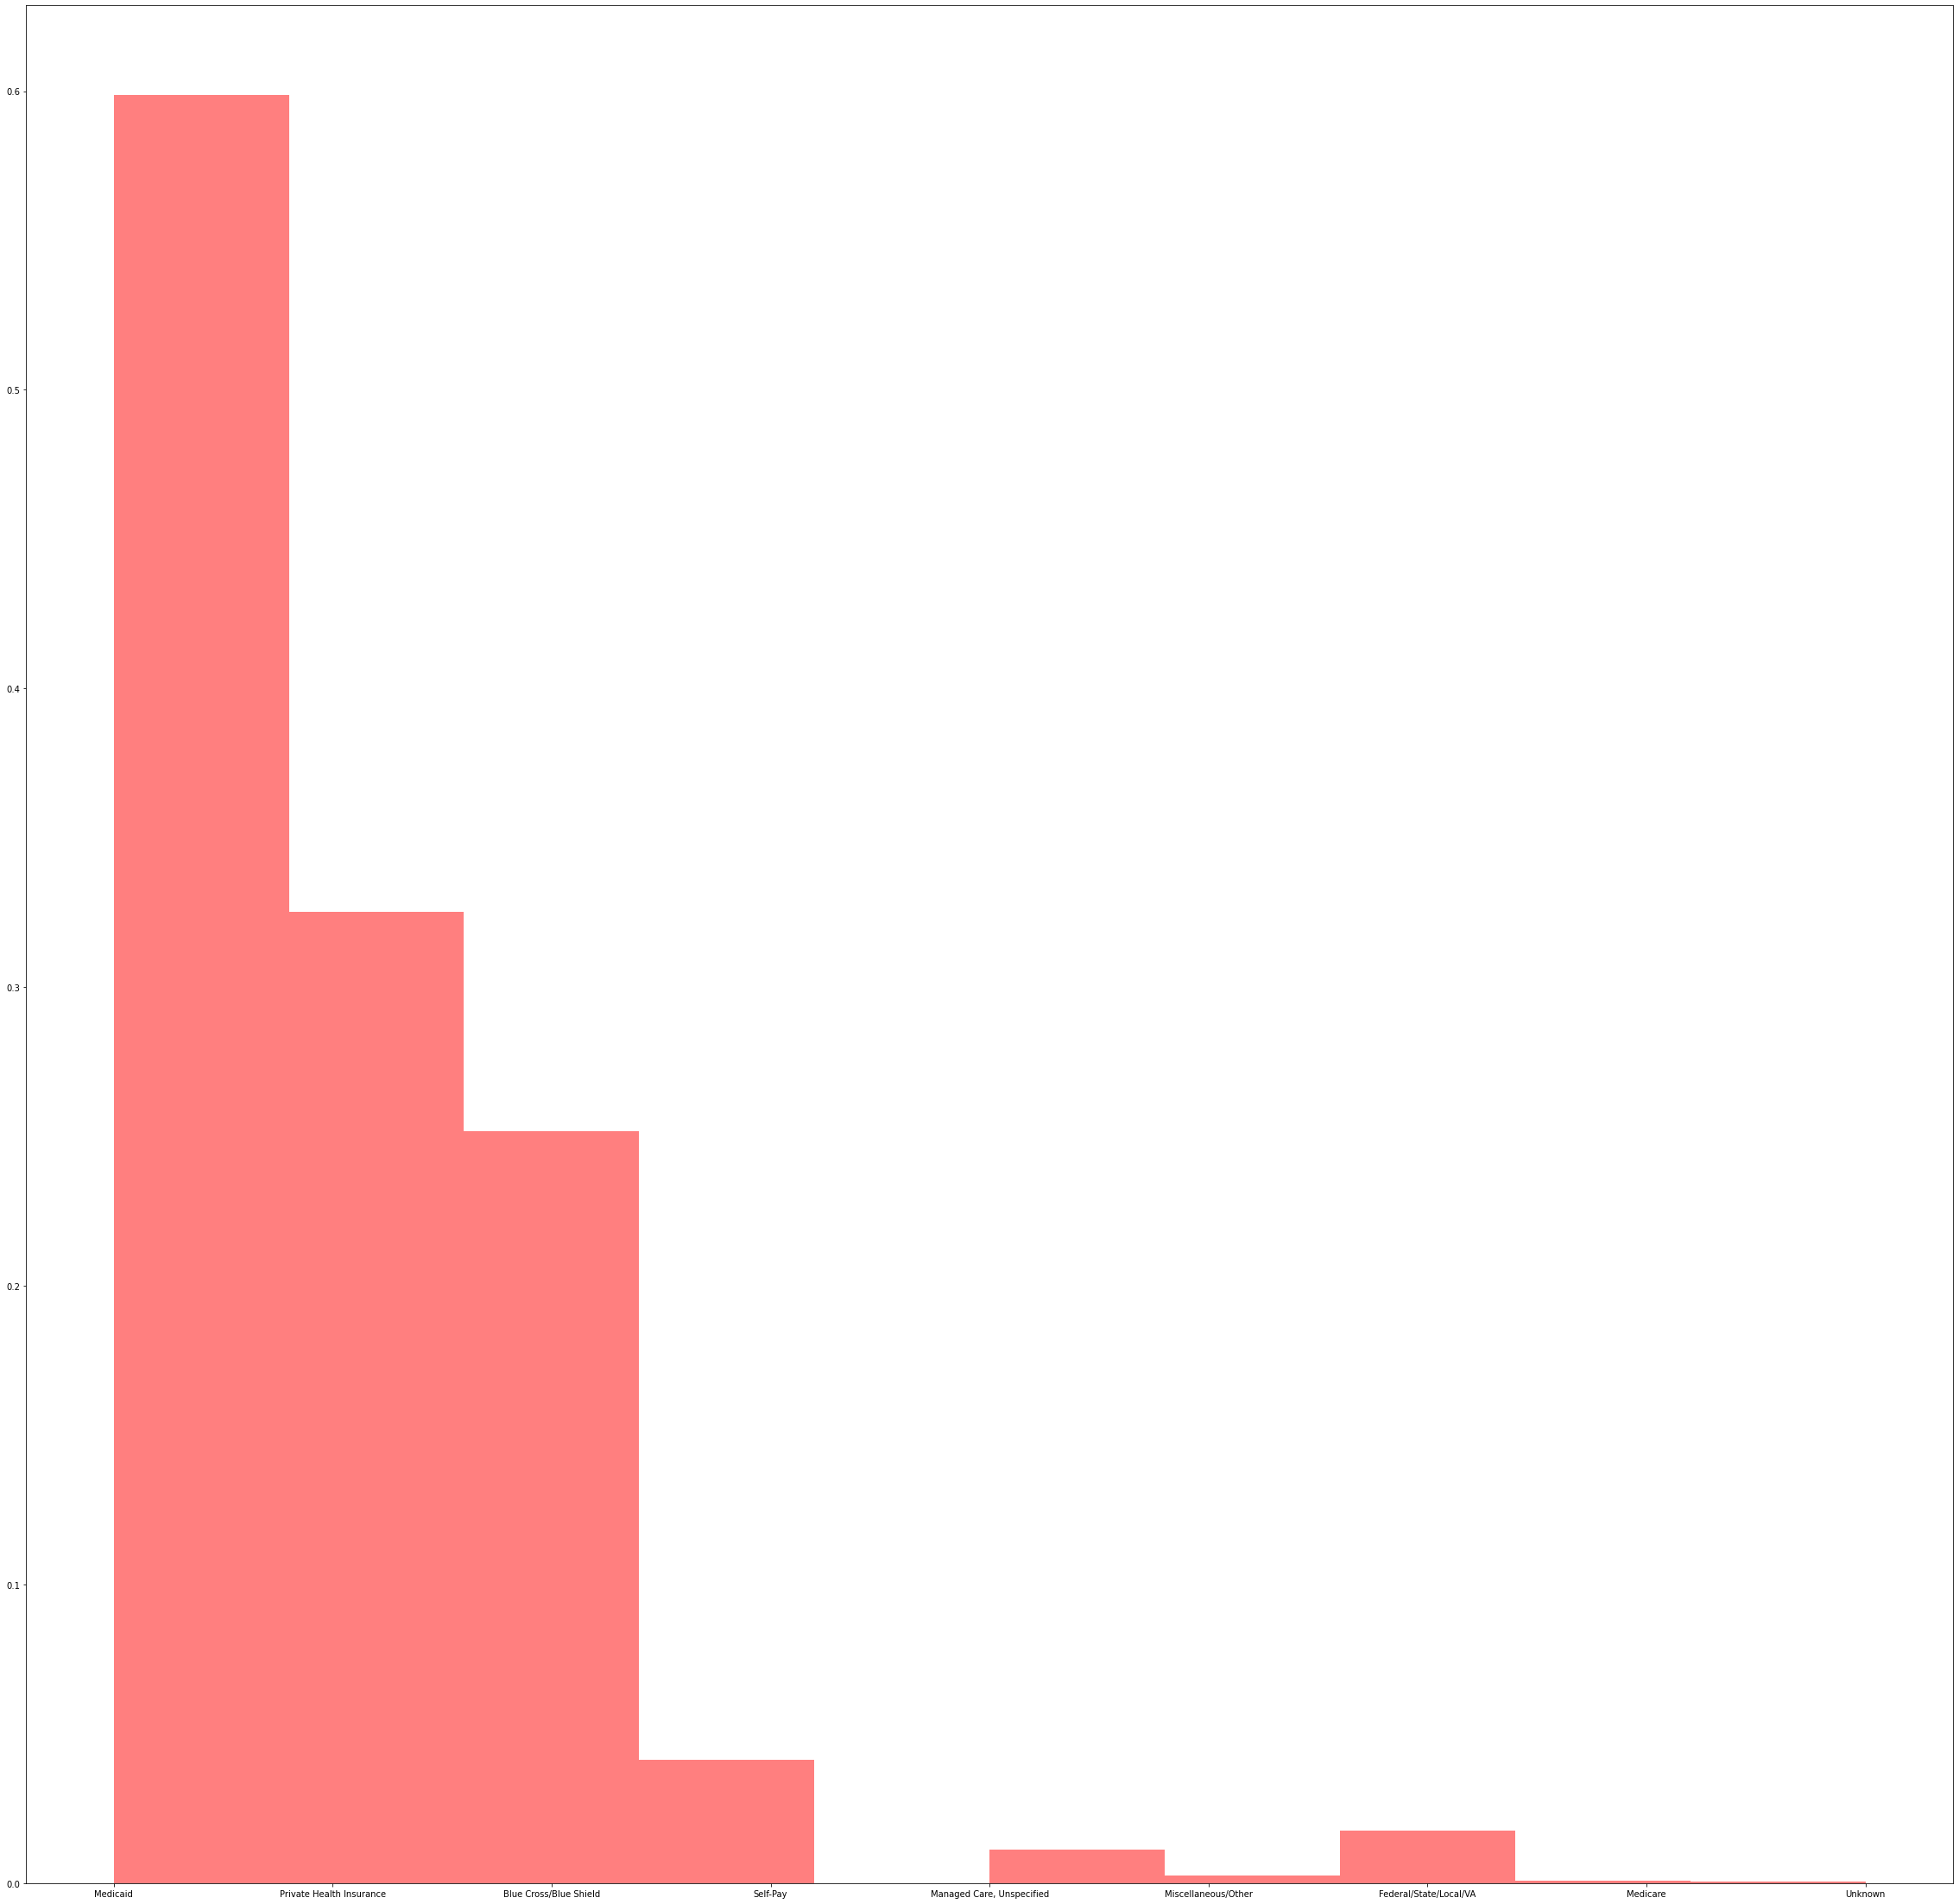

In [119]:
plt.figure(figsize=(40,40))
plt.hist(df['PaymentTypology'],alpha=0.5,color='r',density='True')

In [118]:
string='PaymentTypology'
df[['CCSProcedureCode',string]].groupby([string]).count()

,CCSProcedureCode
PaymentTypology,
Blue Cross/Blue Shield,12073
Federal/State/Local/VA,849
"Managed Care, Unspecified",545
Medicaid,28723
Medicare,44
Miscellaneous/Other,118
Private Health Insurance,15608
Self-Pay,1984
Unknown,22


(array([9.91445152, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08554848]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

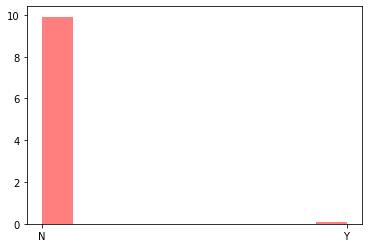

In [120]:
plt.hist(df['EmergencyDepartmentIndicator'],alpha=0.5,color='r',density='True')

So the severity code even though specified in numerical attribute its ordinal in nature 

<b> So far in our analysis
<br><b> Race - Nominal
<br><b> Gender - Nominal 
<br><b> PaymentTypology - Nominal
<br><b> EmergencyDepartmentIndicator- Nominal
<br><b> CCSProcedureCode -- Ordinal 
<br><b> APRSeverityOfIllnessCode - Ordinal 

(array([8.41715444e-05, 9.41244835e-05, 3.11836787e-04, 5.42468136e-05,
        3.66413168e-04, 1.03438062e-03, 9.95293908e-06, 5.87816627e-04,
        5.01733591e-04, 9.07892602e-04]),
 array([ 712.,  965., 1218., 1471., 1724., 1977., 2230., 2483., 2736.,
        2989., 3242.]),
 <BarContainer object of 10 artists>)

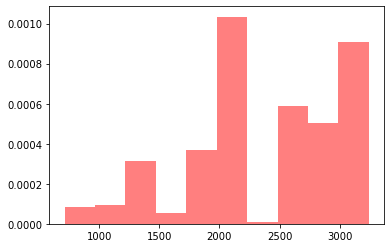

In [122]:
plt.hist(df['AverageCostInCounty'],alpha=0.5,color='r',density='True')

(array([5.71442381e-05, 4.09912036e-05, 1.41084090e-04, 5.32128988e-05,
        5.29661620e-05, 0.00000000e+00, 9.44179409e-06, 1.67748112e-04,
        1.94477930e-04, 2.69321419e-04]),
 array([ 1243. ,  2256.8,  3270.6,  4284.4,  5298.2,  6312. ,  7325.8,
         8339.6,  9353.4, 10367.2, 11381. ]),
 <BarContainer object of 10 artists>)

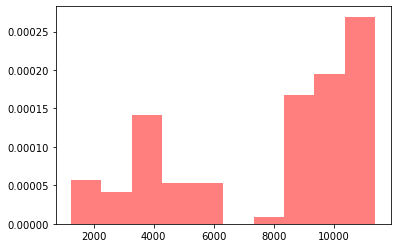

In [123]:
plt.hist(df['AverageChargesInCounty'],alpha=0.5,color='r',density='True')

(array([4.57617401e-05, 1.02646659e-04, 6.66813927e-05, 8.34959481e-05,
        8.67646438e-05, 4.35601774e-05, 7.12960220e-05, 6.23071087e-05,
        1.39784811e-05, 9.61381095e-09]),
 array([ 1120. ,  2854.6,  4589.2,  6323.8,  8058.4,  9793. , 11527.6,
        13262.2, 14996.8, 16731.4, 18466. ]),
 <BarContainer object of 10 artists>)

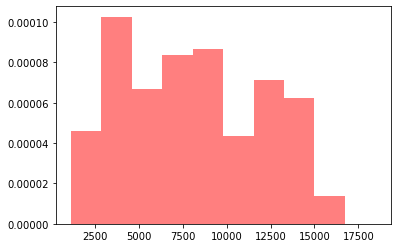

In [124]:
plt.hist(df['AverageChargesInFacility'],alpha=0.5,color='r',density='True')

(array([1.66521597e-04, 4.99129211e-04, 2.61042095e-04, 1.76431004e-04,
        7.82516475e-05, 5.12675698e-05, 2.68098464e-05, 4.65197659e-05,
        0.00000000e+00, 2.17789166e-08]),
 array([ 457. , 1222.7, 1988.4, 2754.1, 3519.8, 4285.5, 5051.2, 5816.9,
        6582.6, 7348.3, 8114. ]),
 <BarContainer object of 10 artists>)

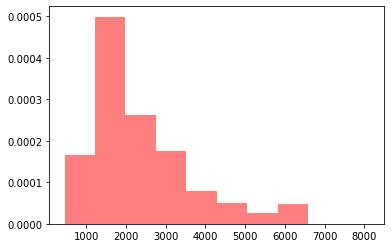

In [126]:
plt.hist(df['AverageCostInFacility'],alpha=0.5,color='r',density='True')

(array([0.01552987, 0.02981958, 0.00911436, 0.02569847, 0.00274868,
        0.01049829, 0.00100057, 0.01260293, 0.00765185, 0.00027794]),
 array([ 28. ,  36.7,  45.4,  54.1,  62.8,  71.5,  80.2,  88.9,  97.6,
        106.3, 115. ]),
 <BarContainer object of 10 artists>)

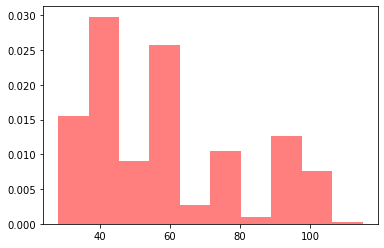

In [128]:
plt.hist(df['AverageIncomeInZipCode'],alpha=0.5,color='r',density='True')

lets focus on now changing the data accordingly and perform scaling etc before we send it to the model 